<a href="https://colab.research.google.com/github/rodrigofer89/Machine-Learning/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_cart%C3%A3o_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Bibliotecas utilizadas
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
# Lerdo os dados
df = pd.read_csv('creditcard.csv')

In [5]:
# Informações dos Atributos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21878 entries, 0 to 21877
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    21878 non-null  int64  
 1   V1      21878 non-null  float64
 2   V2      21878 non-null  float64
 3   V3      21878 non-null  float64
 4   V4      21878 non-null  float64
 5   V5      21878 non-null  float64
 6   V6      21878 non-null  float64
 7   V7      21878 non-null  float64
 8   V8      21878 non-null  float64
 9   V9      21878 non-null  float64
 10  V10     21878 non-null  float64
 11  V11     21878 non-null  float64
 12  V12     21878 non-null  float64
 13  V13     21878 non-null  float64
 14  V14     21878 non-null  float64
 15  V15     21878 non-null  float64
 16  V16     21878 non-null  float64
 17  V17     21878 non-null  float64
 18  V18     21878 non-null  float64
 19  V19     21878 non-null  float64
 20  V20     21878 non-null  float64
 21  V21     21878 non-null  float64
 22

In [7]:
# Visualizando algumas linhas 
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [9]:
# Verificando valores missing
#verificar linhas duplicadas
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [10]:
# Eliminando os valores missing
df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


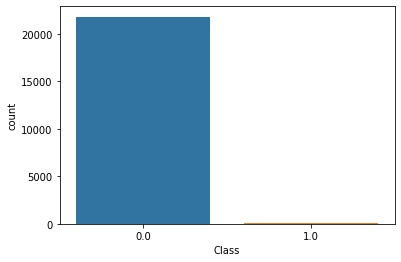

In [12]:
# Dando uma olhada na variável Target
df['Class'].value_counts()
sns.countplot(df['Class'])

In [13]:
# Explorando as correlações com o Target
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.284211
V4        0.261522
V2        0.259959
V8        0.200598
V27       0.135965
V20       0.065875
V21       0.042885
V25       0.032147
V19       0.029348
V28       0.022922
V26       0.017745
Amount    0.006824
Time      0.003817
V15      -0.009043
V13      -0.009892
V22      -0.024029
V24      -0.029307
V23      -0.041799
V6       -0.124538
V9       -0.175465
V18      -0.201947
V5       -0.263605
V1       -0.285602
V12      -0.321828
V16      -0.327048
V10      -0.363563
V7       -0.395674
V17      -0.426317
V14      -0.441833
V3       -0.476294
Name: Class, dtype: float64

In [14]:
# Estatisticas descritivas das variaveis
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21877.000000,21877.000000,21877.000000,21877.000000,21877.000000,21877.000000,21877.000000,21877.000000,21877.000000,21877.000000,...,21877.000000,21877.000000,21877.000000,21877.000000,21877.000000,21877.000000,21877.000000,21877.000000,21877.000000,21877.000000
mean,16923.586689,-0.241062,0.222117,0.737919,0.262269,-0.175253,0.087517,-0.141050,0.019343,0.562077,...,-0.043034,-0.140148,-0.037820,0.010748,0.125685,0.029312,0.011978,0.006293,71.725300,0.003931
std,11005.194861,1.880944,1.518145,1.740987,1.451003,1.414899,1.322632,1.323942,1.383959,1.277302,...,0.849630,0.644928,0.512958,0.590788,0.436865,0.524410,0.395187,0.247259,205.034501,0.062576
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-3.612114,0.000000,0.000000
25%,5495.000000,-0.960944,-0.350080,0.297985,-0.648858,-0.756737,-0.660693,-0.597986,-0.169177,-0.273410,...,-0.257011,-0.564594,-0.175535,-0.331512,-0.136322,-0.339574,-0.067308,-0.010145,5.990000,0.000000
50%,18769.000000,-0.299324,0.206459,0.888766,0.222377,-0.210154,-0.176575,-0.069915,0.026059,0.515114,...,-0.109885,-0.111893,-0.048570,0.062135,0.163906,-0.042032,0.005393,0.019668,17.430000,0.000000
75%,27778.000000,1.164879,0.858520,1.520392,1.132696,0.332763,0.481050,0.447518,0.281488,1.330402,...,0.059945,0.267695,0.074160,0.399321,0.404517,0.320193,0.095830,0.077594,62.390000,0.000000
max,31907.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


### 3 Pré-Processamento dos dados


In [29]:
# Rodando com as 50000 primeiras linhas para acelerar a execução
#df = df[:50000]

# Separando os dados para treinamento e teste da máquina preditiva
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.3, random_state = 42)

In [30]:
# Construindo o Modelo
model = RandomForestClassifier()
# Treinando o modelo
model = model.fit(X_train, y_train)

In [31]:
# Passando novos dados (dados de teste) para o modelo
y_pred = model.predict(X_val)

In [32]:
# Comparando dado real com a previsão da máquina
real = pd.DataFrame({'val_Esperado': y_val, 'Previsões da máquina': y_pred})
real

,val_Esperado,Previsões da máquina
15991,0.0,0.0
4724,0.0,0.0
1427,0.0,0.0
13024,0.0,0.0
7889,0.0,0.0
...,...,...
5836,0.0,0.0
11285,0.0,0.0
14088,0.0,0.0
19321,0.0,0.0


In [33]:
# Metricas do modelo
print('Classification metrics: \n', classification_report(y_val, y_pred))

Classification metrics: 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6538
         1.0       0.95      0.81      0.88        26

    accuracy                           1.00      6564
   macro avg       0.98      0.90      0.94      6564
weighted avg       1.00      1.00      1.00      6564



### FIM!